In [ ]:
!pip -q install pycaret 

In [ ]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pycaret.classification import *

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score


sns.set()
%matplotlib inline

In [ ]:
# Carregando o Dataset
url = 'https://raw.githubusercontent.com/arecoluiz/Assignment_18/main/heart.csv' 
df = pd.read_csv(url)
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.shape

(303, 14)

In [ ]:
# Verificando nulos
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [ ]:
# Distribuição da variável target
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

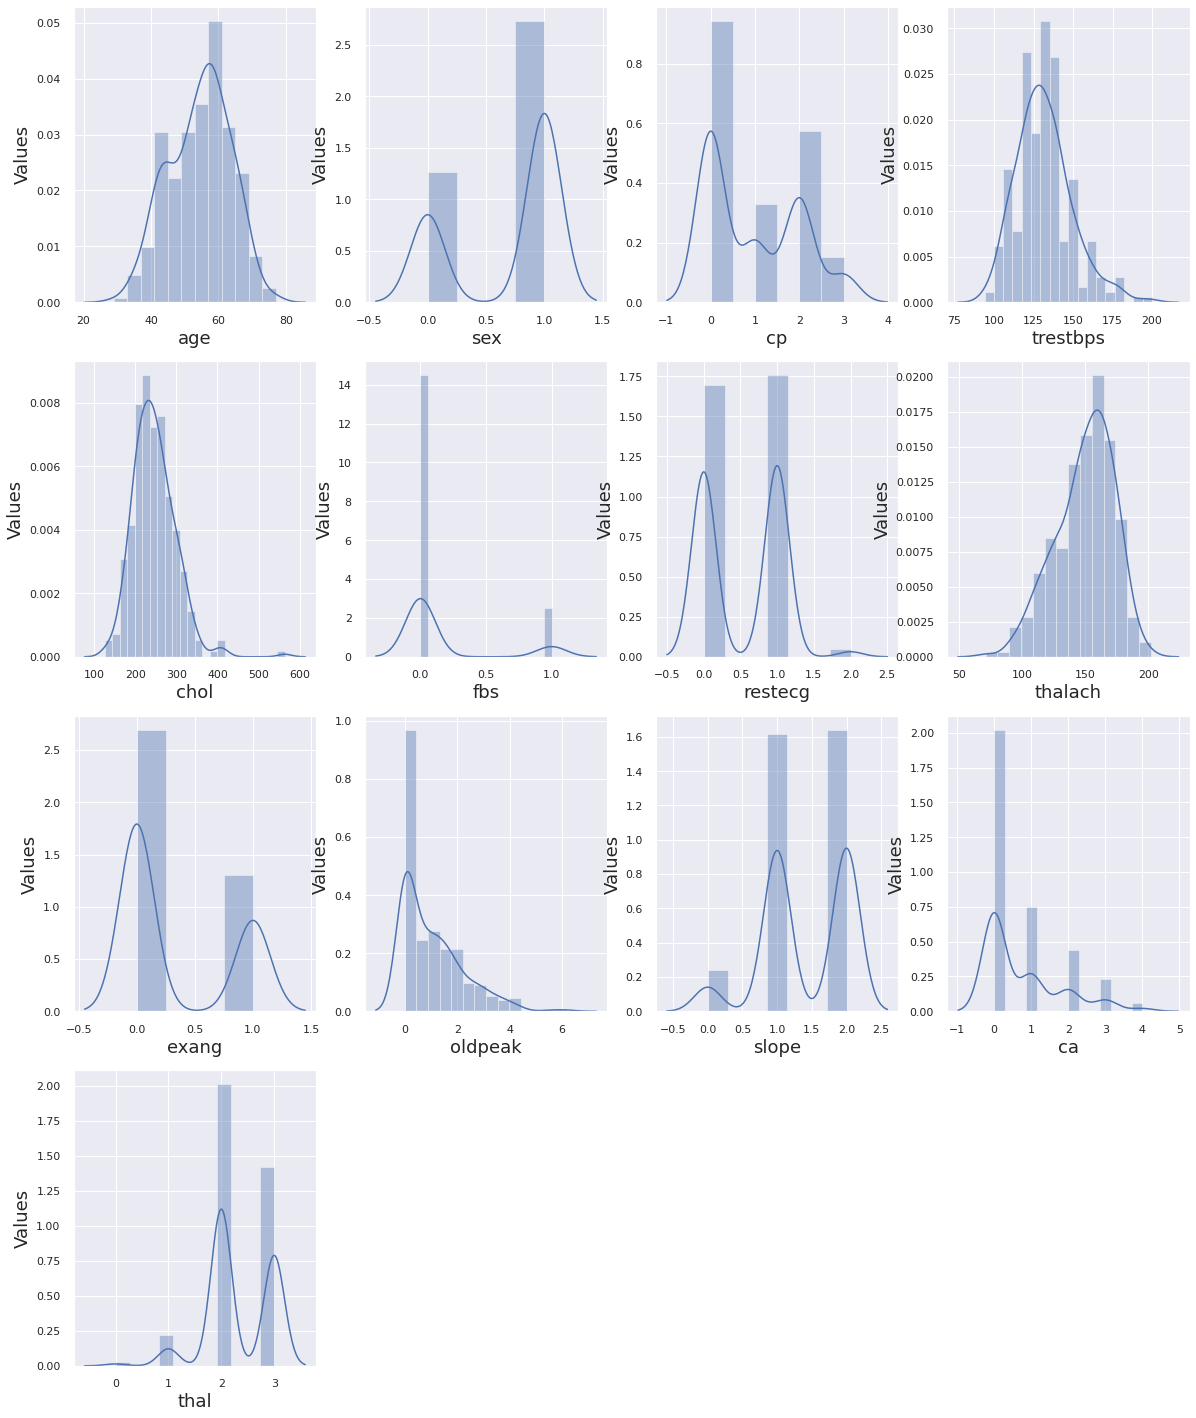

In [ ]:
# Analizando a distribuição das Variáveis
plt.figure(figsize=(20,25))
plotnumber=1

for column in df:
  if plotnumber<14:
    ax=plt.subplot(4,4,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=18)
    plt.ylabel('Values',fontsize=18)
  plotnumber+=1
plt.show()

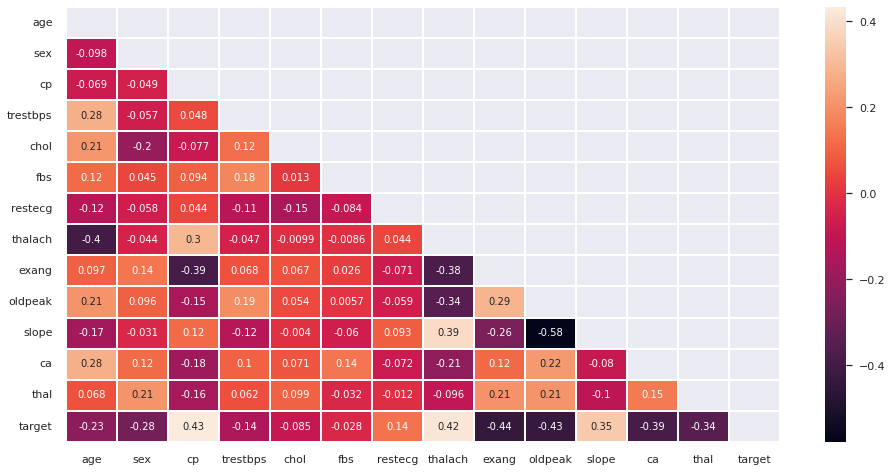

In [ ]:
# Matriz de Correlação
plt.figure(figsize = (16, 8))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1)
plt.show()

In [ ]:
# Setup para utilização do pycaret

Overall = setup(df, target = 'target')

,Description,Value
0,session_id,1821
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(303, 14)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
#Comparação de modelos, classificados pelo F1 score

best_model = compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8491,0.9061,0.8985,0.8465,0.8692,0.6900,0.6989,0.084
lda,Linear Discriminant Analysis,0.8255,0.8995,0.9068,0.8106,0.8531,0.6386,0.6535,0.014
ridge,Ridge Classifier,0.8253,0.0000,0.8985,0.8145,0.8519,0.6385,0.6508,0.012
et,Extra Trees Classifier,0.8307,0.8777,0.8659,0.8388,0.8457,0.6567,0.6692,0.173
rf,Random Forest Classifier,0.8113,0.8652,0.8652,0.8136,0.8363,0.6128,0.6197,0.213
ada,Ada Boost Classifier,0.7682,0.8255,0.8061,0.7981,0.7957,0.5241,0.5357,0.191
lightgbm,Light Gradient Boosting Machine,0.7736,0.8221,0.8061,0.7897,0.7954,0.5405,0.5455,0.030
gbc,Gradient Boosting Classifier,0.7595,0.8330,0.8061,0.7769,0.7880,0.5073,0.5149,0.081
nb,Naive Bayes,0.7740,0.8459,0.7826,0.8085,0.7828,0.5462,0.5583,0.013
knn,K Neighbors Classifier,0.7316,0.7804,0.8167,0.7433,0.7729,0.4448,0.4586,0.022


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1821, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
#' Normalização logarítimica de Variáveis

df['trestbps']=np.log(df['trestbps'])
df['chol']=np.log(df['chol'])
df['thalach']=np.log(df['thalach'])

np.var(df[["trestbps",'chol','thalach']])

trestbps    0.000708
chol        0.001378
thalach     0.001124
dtype: float64

In [ ]:
# Definindo x e y:
X = df.iloc[:,:13]
y = df.iloc[:, -1]

In [ ]:
#Separando datasets de treino e teste
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=43)

In [ ]:
# Utilizando a regressão logistica, como obteve o melhor F1 score
clf = LogisticRegression()

In [ ]:
# Fazendo o fit do modelo
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Realizando a predição
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
# Métrica F1 Score
print(f"F1: {f1_score(y_test, y_pred)*100}%")

F1: 90.41095890410958%


In [ ]:
# Results
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        28
           1       0.82      1.00      0.90        33

    accuracy                           0.89        61
   macro avg       0.91      0.88      0.88        61
weighted avg       0.91      0.89      0.88        61

